In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator, PercentFormatter)
import numpy as np
pd.set_option('display.max_rows', 50)

In [2]:
kalandra_currency = pd.read_csv("Currency/Kalandra.currency.csv", sep = ";")
sentinel_currency = pd.read_csv("Currency/Sentinel.currency.csv", sep = ";")
archnemesis_currency = pd.read_csv("Currency/Archnemesis.currency.csv", sep = ";")
scourge_currency = pd.read_csv("Currency/Scourge.currency.csv", sep = ";")

expedition_currency = pd.read_csv("Currency/Expedition.currency.csv", sep = ";")
# ultimatum_currency = pd.read_csv("Currency/Ultimatum.currency.csv", sep = ";")
# ritual_currency = pd.read_csv("Currency/Ritual.currency.csv", sep = ";")

In [3]:
kalandra_items = pd.read_csv("Items/Kalandra.items.csv", sep = ";")
sentinel_items = pd.read_csv("Items/Sentinel.items.csv", sep = ";")
archnemesis_items = pd.read_csv("Items/Archnemesis.items.csv", sep = ";")
scourge_items = pd.read_csv("Items/Scourge.items.csv", sep = ";")
expedition_items = pd.read_csv("Items/Expedition.items.csv", sep = ";")
# ultimatum_items = pd.read_csv("Items/Ultimatum.items.csv", sep = ";")
# ritual_items = pd.read_csv("Items/Ritual.items.csv", sep = ";")

C:\Users\65978\AppData\Local\Temp\ipykernel_26680\2927981104.py:3: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  archnemesis_items = pd.read_csv("Items/Archnemesis.items.csv", sep = ";")
C:\Users\65978\AppData\Local\Temp\ipykernel_26680\2927981104.py:4: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  scourge_items = pd.read_csv("Items/Scourge.items.csv", sep = ";")
C:\Users\65978\AppData\Local\Temp\ipykernel_26680\2927981104.py:5: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  expedition_items = pd.read_csv("Items/Expedition.items.csv", sep = ";")


House of Mirrors : df_houseOfMirror

The Immortal : df_TheImmortal

Unrequited Love : df_unrequitedLove

Seven Years Bad Luck : df_sevenYearsBadLuck

Mirror : df_mirrorOfKal

MirrorShard : df_mirrorShard

In [4]:
kalandra_houseOfMirror = kalandra_items.loc[kalandra_items['Name']=='House of Mirrors']
sentinel_houseOfMirror = sentinel_items.loc[sentinel_items['Name']=='House of Mirrors']
archnemesis_houseOfMirror = archnemesis_items.loc[archnemesis_items['Name']=='House of Mirrors']
scourge_houseOfMirror = scourge_items.loc[scourge_items['Name']=='House of Mirrors']
expedition_houseOfMirror = expedition_items.loc[expedition_items['Name']=='House of Mirrors']
# ultimatum_houseOfMirror = ultimatum.loc[ultimatum['Name']=='House of Mirrors']
# ritual_houseOfMirror = ritual.loc[ritual['Name']=='House of Mirrors']

# kalandra_houseOfMirror = kalandra_houseOfMirror[kalandra_houseOfMirror.Value < 250000]
# kalandra_houseOfMirror = kalandra_houseOfMirror[kalandra_houseOfMirror.Value > 1000]

kalandra_newID = kalandra_houseOfMirror.copy()
sentinel_newID = sentinel_houseOfMirror.copy()
archnemesis_newID = archnemesis_houseOfMirror.copy()
scourge_newID = scourge_houseOfMirror.copy()
expedition_newID = expedition_houseOfMirror.copy()
# ultimatum_newID = ultimatum_houseOfMirror.copy()
# ritual_newID = ritual_houseOfMirror.copy()

kalandra_newID.insert(0, 'Days', range(1, 1+len(kalandra_newID['Date'])))
sentinel_newID.insert(0, 'Days', range(1, 1+len(sentinel_newID['Date'])))
archnemesis_newID.insert(0, 'Days', range(1, 1+len(archnemesis_newID['Date'])))
scourge_newID.insert(0, 'Days', range(1, 1+len(scourge_newID['Date'])))
expedition_newID.insert(0, 'Days', range(1, 1+len(expedition_newID['Date'])))
# ultimatum_newID.insert(0, 'Days', range(1, 1+len(ultimatum_newID['Date'])))
# ritual_newID.insert(0, 'Days', range(1, 1+len(ritual_newID['Date'])))

#Graph 1 Start here

# fig, ax = plt.subplots(figsize=(20,10))
# plt.title('Chaos Price for House Of Mirrors', fontsize=15,fontweight='bold')
# ax.plot(kalandra_newID['Days'],kalandra_newID['Value'], label = 'Kalandra')
# ax.plot(sentinel_newID['Days'],sentinel_newID['Value'], label = 'Sentinel')
# ax.plot(archnemesis_newID['Days'],archnemesis_newID['Value'], label = 'Archnemesis')
# ax.plot(scourge_newID['Days'],scourge_newID['Value'], label = 'Scourge')
# ax.plot(expedition_newID['Days'],expedition_newID['Value'], label = 'Expedition')
# # ax.plot(ultimatum_newID['Days'],ultimatum_newID['Value'], label = 'Ultimatum')
# # ax.plot(ritual_newID['Days'],ritual_newID['Value'], label = 'Ritual')
# ax.legend()
# fig.show()

#Graph 1 End here

kalandra_Ref1stDay = kalandra_houseOfMirror.copy()
sentinel_Ref1stDay = sentinel_houseOfMirror.copy()
archnemesis_Ref1stDay = archnemesis_houseOfMirror.copy()
scourge_Ref1stDay = scourge_houseOfMirror.copy()
expedition_Ref1stDay = expedition_houseOfMirror.copy()
# ultimatum_Ref1stDay = ultimatum_houseOfMirror.copy()
# ritual_Ref1stDay = ritual_houseOfMirror.copy()

def get_variation(values: pd.Series) -> np.float64:
    base = values.iloc[0]  # first element in window iteration
    current = values.iloc[-1]  # last element in window iteration
    return (current - base) / base if base else 0  # avoid ZeroDivisionError

kalandra_Ref1stDay.insert(0, 'Days', range(1, 1+len(kalandra_Ref1stDay['Date'])))
kalandra_Ref1stDay.insert(4, 'Pct_change_RefDay_1', kalandra_Ref1stDay['Value'].expanding().apply(get_variation))
# kalandra_Ref1stDay = kalandra_Ref1stDay.assign(change=variations.droplevel(0)) #dont know whats this for
sentinel_Ref1stDay.insert(0, 'Days', range(1, 1+len(sentinel_Ref1stDay['Date'])))
sentinel_Ref1stDay.insert(4, 'Pct_change_RefDay_1', sentinel_Ref1stDay['Value'].expanding().apply(get_variation))
archnemesis_Ref1stDay.insert(0, 'Days', range(1, 1+len(archnemesis_Ref1stDay['Date'])))
archnemesis_Ref1stDay.insert(4, 'Pct_change_RefDay_1', archnemesis_Ref1stDay['Value'].expanding().apply(get_variation))
scourge_Ref1stDay.insert(0, 'Days', range(1, 1+len(scourge_Ref1stDay['Date'])))
scourge_Ref1stDay.insert(4, 'Pct_change_RefDay_1', scourge_Ref1stDay['Value'].expanding().apply(get_variation))
expedition_Ref1stDay.insert(0, 'Days', range(1, 1+len(expedition_Ref1stDay['Date'])))
expedition_Ref1stDay.insert(4, 'Pct_change_RefDay_1', expedition_Ref1stDay['Value'].expanding().apply(get_variation))
# ultimatum_Ref1stDay.insert(0, 'Days', range(1, 1+len(ultimatum_Ref1stDay['Date'])))
# ultimatum_Ref1stDay.insert(4, 'Pct_change_RefDay_1', ultimatum_Ref1stDay['Value'].expanding().apply(get_variation))
# ritual_Ref1stDay.insert(0, 'Days', range(1, 1+len(ritual_Ref1stDay['Date'])))
# ritual_Ref1stDay.insert(4, 'Pct_change_RefDay_1', ritual_Ref1stDay['Value'].expanding().apply(get_variation))

#Graph 2 Start here

# fig, ax = plt.subplots(figsize=(20,10))
# plt.title('Chaos Price for House of Mirrors in percentage', fontsize=15,fontweight='bold')
# ax.xaxis.set_minor_locator(MultipleLocator(1))
# ax.xaxis.set_major_locator(MultipleLocator(5))
# ax.yaxis.set_major_formatter(PercentFormatter(xmax=1))
# ax.yaxis.set_minor_locator(AutoMinorLocator(5))

# ax.plot(kalandra_Ref1stDay['Days'],kalandra_Ref1stDay['Pct_change_RefDay_1'],label = 'kalandra')
# ax.plot(sentinel_Ref1stDay['Days'],sentinel_Ref1stDay['Pct_change_RefDay_1'],label = 'sentinel')
# ax.plot(archnemesis_Ref1stDay['Days'],archnemesis_Ref1stDay['Pct_change_RefDay_1'],label = 'Archnemesis')
# ax.plot(scourge_Ref1stDay['Days'],scourge_Ref1stDay['Pct_change_RefDay_1'],label = 'scourge')
# ax.plot(expedition_Ref1stDay['Days'],expedition_Ref1stDay['Pct_change_RefDay_1'],label = 'expedition')
# # ax.plot(ultimatum_Ref1stDay['Days'],ultimatum_Ref1stDay['Pct_change_RefDay_1'],label = 'ultimatum')
# # ax.plot(ritual_Ref1stDay['Days'],ritual_Ref1stDay['Pct_change_RefDay_1'],label = 'ritual')
# ax.legend()

#Graph 2 End here

glued_kalandra = kalandra_Ref1stDay.copy()
glued_kalandra = glued_kalandra.reset_index()
glued_sentinel = sentinel_Ref1stDay.copy()
glued_sentinel = glued_sentinel.reset_index()
glued_archnemesis = archnemesis_Ref1stDay.copy()
glued_archnemesis = glued_archnemesis.reset_index()
glued_scourge = scourge_Ref1stDay.copy()
glued_scourge = glued_scourge.reset_index()
glued_expedition = expedition_Ref1stDay.copy()
glued_expedition = glued_expedition.reset_index()

glued_houseOfMirror = pd.concat([glued_scourge['Days'],glued_kalandra['Pct_change_RefDay_1'],
                   glued_sentinel['Pct_change_RefDay_1'], glued_archnemesis['Pct_change_RefDay_1'],
                  glued_scourge['Pct_change_RefDay_1'],glued_expedition['Pct_change_RefDay_1']], axis=1)
# glued
df_houseOfMirror = glued_houseOfMirror.groupby(level=0, axis=1).mean()

#Graph 3 Start here

# fig, ax = plt.subplots(figsize=(20,10))
# plt.title('Average League Chaos Price for House of Mirrors in percentage', fontsize=15,fontweight='bold')
# ax.xaxis.set_minor_locator(MultipleLocator(1))
# ax.xaxis.set_major_locator(MultipleLocator(5))
# ax.yaxis.set_major_formatter(PercentFormatter(xmax=1))
# ax.yaxis.set_minor_locator(AutoMinorLocator(5))
# ax.plot(df_houseOfMirror['Days'],df_houseOfMirror['Pct_change_RefDay_1'],label = 'Combined')
# ax.legend()

#Graph 3 End here


In [5]:
kalandra_TheImmortal = kalandra_items.loc[kalandra_items['Name']=='The Immortal']
sentinel_TheImmortal = sentinel_items.loc[sentinel_items['Name']=='The Immortal']
archnemesis_TheImmortal = archnemesis_items.loc[archnemesis_items['Name']=='The Immortal']
scourge_TheImmortal = scourge_items.loc[scourge_items['Name']=='The Immortal']
expedition_TheImmortal = expedition_items.loc[expedition_items['Name']=='The Immortal']
# ultimatum_TheImmortal = ultimatum.loc[ultimatum['Name']=='The Immortal']
# ritual_TheImmortal = ritual.loc[ritual['Name']=='The Immortal']

# kalandra_TheImmortal = kalandra_TheImmortal[kalandra_TheImmortal.Value < 250000]
# kalandra_TheImmortal = kalandra_TheImmortal[kalandra_TheImmortal.Value > 1000]

kalandra_newID = kalandra_TheImmortal.copy()
sentinel_newID = sentinel_TheImmortal.copy()
archnemesis_newID = archnemesis_TheImmortal.copy()
scourge_newID = scourge_TheImmortal.copy()
expedition_newID = expedition_TheImmortal.copy()
# ultimatum_newID = ultimatum_TheImmortal.copy()
# ritual_newID = ritual_TheImmortal.copy()

kalandra_newID.insert(0, 'Days', range(1, 1+len(kalandra_newID['Date'])))
sentinel_newID.insert(0, 'Days', range(1, 1+len(sentinel_newID['Date'])))
archnemesis_newID.insert(0, 'Days', range(1, 1+len(archnemesis_newID['Date'])))
scourge_newID.insert(0, 'Days', range(1, 1+len(scourge_newID['Date'])))
expedition_newID.insert(0, 'Days', range(1, 1+len(expedition_newID['Date'])))
# ultimatum_newID.insert(0, 'Days', range(1, 1+len(ultimatum_newID['Date'])))
# ritual_newID.insert(0, 'Days', range(1, 1+len(ritual_newID['Date'])))

#Graph 1 Start here

# fig, ax = plt.subplots(figsize=(20,10))
# plt.title('Chaos Price for The Immortal', fontsize=15,fontweight='bold')
# ax.plot(kalandra_newID['Days'],kalandra_newID['Value'], label = 'Kalandra')
# ax.plot(sentinel_newID['Days'],sentinel_newID['Value'], label = 'Sentinel')
# ax.plot(archnemesis_newID['Days'],archnemesis_newID['Value'], label = 'Archnemesis')
# ax.plot(scourge_newID['Days'],scourge_newID['Value'], label = 'Scourge')
# ax.plot(expedition_newID['Days'],expedition_newID['Value'], label = 'Expedition')
# # ax.plot(ultimatum_newID['Days'],ultimatum_newID['Value'], label = 'Ultimatum')
# # ax.plot(ritual_newID['Days'],ritual_newID['Value'], label = 'Ritual')
# ax.legend()
# fig.show()
#Graph 1 End here


kalandra_Ref1stDay = kalandra_TheImmortal.copy()
sentinel_Ref1stDay = sentinel_TheImmortal.copy()
archnemesis_Ref1stDay = archnemesis_TheImmortal.copy()
scourge_Ref1stDay = scourge_TheImmortal.copy()
expedition_Ref1stDay = expedition_TheImmortal.copy()
# ultimatum_Ref1stDay = ultimatum_TheImmortal.copy()
# ritual_Ref1stDay = ritual_TheImmortal.copy()

def get_variation(values: pd.Series) -> np.float64:
    base = values.iloc[0]  # first element in window iteration
    current = values.iloc[-1]  # last element in window iteration
    return (current - base) / base if base else 0  # avoid ZeroDivisionError

# variations = archnemesis_Ref1stDay['Value'].expanding().apply(get_variation)
kalandra_Ref1stDay.insert(0, 'Days', range(1, 1+len(kalandra_Ref1stDay['Date'])))
kalandra_Ref1stDay.insert(4, 'Pct_change_RefDay_1', kalandra_Ref1stDay['Value'].expanding().apply(get_variation))
# kalandra_Ref1stDay = kalandra_Ref1stDay.assign(change=variations.droplevel(0)) #dont know whats this for
sentinel_Ref1stDay.insert(0, 'Days', range(1, 1+len(sentinel_Ref1stDay['Date'])))
sentinel_Ref1stDay.insert(4, 'Pct_change_RefDay_1', sentinel_Ref1stDay['Value'].expanding().apply(get_variation))
archnemesis_Ref1stDay.insert(0, 'Days', range(1, 1+len(archnemesis_Ref1stDay['Date'])))
archnemesis_Ref1stDay.insert(4, 'Pct_change_RefDay_1', archnemesis_Ref1stDay['Value'].expanding().apply(get_variation))
scourge_Ref1stDay.insert(0, 'Days', range(1, 1+len(scourge_Ref1stDay['Date'])))
scourge_Ref1stDay.insert(4, 'Pct_change_RefDay_1', scourge_Ref1stDay['Value'].expanding().apply(get_variation))
expedition_Ref1stDay.insert(0, 'Days', range(1, 1+len(expedition_Ref1stDay['Date'])))
expedition_Ref1stDay.insert(4, 'Pct_change_RefDay_1', expedition_Ref1stDay['Value'].expanding().apply(get_variation))
# ultimatum_Ref1stDay.insert(0, 'Days', range(1, 1+len(ultimatum_Ref1stDay['Date'])))
# ultimatum_Ref1stDay.insert(4, 'Pct_change_RefDay_1', ultimatum_Ref1stDay['Value'].expanding().apply(get_variation))
# ritual_Ref1stDay.insert(0, 'Days', range(1, 1+len(ritual_Ref1stDay['Date'])))
# ritual_Ref1stDay.insert(4, 'Pct_change_RefDay_1', ritual_Ref1stDay['Value'].expanding().apply(get_variation))

#Graph 2 Start here

# fig, ax = plt.subplots(figsize=(20,10))
# plt.title('Chaos Price for The Immortal in percentage', fontsize=15,fontweight='bold')
# ax.xaxis.set_minor_locator(MultipleLocator(1))
# ax.xaxis.set_major_locator(MultipleLocator(5))
# ax.yaxis.set_major_formatter(PercentFormatter(xmax=1))
# ax.yaxis.set_minor_locator(AutoMinorLocator(5))

# ax.plot(kalandra_Ref1stDay['Days'],kalandra_Ref1stDay['Pct_change_RefDay_1'],label = 'kalandra')
# ax.plot(sentinel_Ref1stDay['Days'],sentinel_Ref1stDay['Pct_change_RefDay_1'],label = 'sentinel')
# ax.plot(archnemesis_Ref1stDay['Days'],archnemesis_Ref1stDay['Pct_change_RefDay_1'],label = 'Archnemesis')
# ax.plot(scourge_Ref1stDay['Days'],scourge_Ref1stDay['Pct_change_RefDay_1'],label = 'scourge')
# ax.plot(expedition_Ref1stDay['Days'],expedition_Ref1stDay['Pct_change_RefDay_1'],label = 'expedition')
# # ax.plot(ultimatum_Ref1stDay['Days'],ultimatum_Ref1stDay['Pct_change_RefDay_1'],label = 'ultimatum')
# # ax.plot(ritual_Ref1stDay['Days'],ritual_Ref1stDay['Pct_change_RefDay_1'],label = 'ritual')
# ax.legend()

#Graph 2 End here

glued_kalandra = kalandra_Ref1stDay.copy()
glued_kalandra = glued_kalandra.reset_index()
glued_sentinel = sentinel_Ref1stDay.copy()
glued_sentinel = glued_sentinel.reset_index()
glued_archnemesis = archnemesis_Ref1stDay.copy()
glued_archnemesis = glued_archnemesis.reset_index()
glued_scourge = scourge_Ref1stDay.copy()
glued_scourge = glued_scourge.reset_index()
glued_expedition = expedition_Ref1stDay.copy()
glued_expedition = glued_expedition.reset_index()

glued_TheImmortal = pd.concat([glued_scourge['Days'],glued_kalandra['Pct_change_RefDay_1'],
                   glued_sentinel['Pct_change_RefDay_1'], glued_archnemesis['Pct_change_RefDay_1'],
                  glued_scourge['Pct_change_RefDay_1'],glued_expedition['Pct_change_RefDay_1']], axis=1)
# glued
df_TheImmortal = glued_TheImmortal.groupby(level=0, axis=1).mean()

#Graph 3 Start here

# fig, ax = plt.subplots(figsize=(20,10))
# plt.title('Average League Chaos Price for The Immortal in percentage', fontsize=15,fontweight='bold')
# ax.xaxis.set_minor_locator(MultipleLocator(1))
# ax.xaxis.set_major_locator(MultipleLocator(5))
# ax.yaxis.set_major_formatter(PercentFormatter(xmax=1))
# ax.yaxis.set_minor_locator(AutoMinorLocator(5))
# ax.plot(df_TheImmortal['Days'],df_TheImmortal['Pct_change_RefDay_1'],label = 'Combined')
# ax.legend()
#Graph 3 End here


In [6]:
kalandra_unrequitedLove = kalandra_items.loc[kalandra_items['Name']=='Unrequited Love']
sentinel_unrequitedLove = sentinel_items.loc[sentinel_items['Name']=='Unrequited Love']
archnemesis_unrequitedLove = archnemesis_items.loc[archnemesis_items['Name']=='Unrequited Love']
scourge_unrequitedLove = scourge_items.loc[scourge_items['Name']=='Unrequited Love']
expedition_unrequitedLove = expedition_items.loc[expedition_items['Name']=='Unrequited Love']
# ultimatum_unrequitedLove = ultimatum.loc[ultimatum['Name']=='Unrequited Love']
# ritual_unrequitedLove = ritual.loc[ritual['Name']=='Unrequited Love']


# kalandra_unrequitedLove = kalandra_unrequitedLove[kalandra_unrequitedLove.Value < 250000]
# kalandra_unrequitedLove = kalandra_unrequitedLove[kalandra_unrequitedLove.Value > 1000]

kalandra_newID = kalandra_unrequitedLove.copy()
sentinel_newID = sentinel_unrequitedLove.copy()
archnemesis_newID = archnemesis_unrequitedLove.copy()
scourge_newID = scourge_unrequitedLove.copy()
expedition_newID = expedition_unrequitedLove.copy()
# ultimatum_newID = ultimatum_unrequitedLove.copy()
# ritual_newID = ritual_unrequitedLove.copy()

kalandra_newID.insert(0, 'Days', range(1, 1+len(kalandra_newID['Date'])))
sentinel_newID.insert(0, 'Days', range(1, 1+len(sentinel_newID['Date'])))
archnemesis_newID.insert(0, 'Days', range(1, 1+len(archnemesis_newID['Date'])))
scourge_newID.insert(0, 'Days', range(1, 1+len(scourge_newID['Date'])))
expedition_newID.insert(0, 'Days', range(1, 1+len(expedition_newID['Date'])))
# ultimatum_newID.insert(0, 'Days', range(1, 1+len(ultimatum_newID['Date'])))
# ritual_newID.insert(0, 'Days', range(1, 1+len(ritual_newID['Date'])))

#Graph 1 Start here

# fig, ax = plt.subplots(figsize=(20,10))
# plt.title('Chaos Price for Unrequited Love', fontsize=15,fontweight='bold')
# ax.plot(kalandra_newID['Days'],kalandra_newID['Value'], label = 'Kalandra')
# ax.plot(sentinel_newID['Days'],sentinel_newID['Value'], label = 'Sentinel')
# ax.plot(archnemesis_newID['Days'],archnemesis_newID['Value'], label = 'Archnemesis')
# ax.plot(scourge_newID['Days'],scourge_newID['Value'], label = 'Scourge')
# ax.plot(expedition_newID['Days'],expedition_newID['Value'], label = 'Expedition')
# # ax.plot(ultimatum_newID['Days'],ultimatum_newID['Value'], label = 'Ultimatum')
# # ax.plot(ritual_newID['Days'],ritual_newID['Value'], label = 'Ritual')
# ax.legend()
# fig.show()

#Graph 1 End here

kalandra_Ref1stDay = kalandra_unrequitedLove.copy()
sentinel_Ref1stDay = sentinel_unrequitedLove.copy()
archnemesis_Ref1stDay = archnemesis_unrequitedLove.copy()
scourge_Ref1stDay = scourge_unrequitedLove.copy()
expedition_Ref1stDay = expedition_unrequitedLove.copy()
# ultimatum_Ref1stDay = ultimatum_unrequitedLove.copy()
# ritual_Ref1stDay = ritual_unrequitedLove.copy()

def get_variation(values: pd.Series) -> np.float64:
    base = values.iloc[0]  # first element in window iteration
    current = values.iloc[-1]  # last element in window iteration
    return (current - base) / base if base else 0  # avoid ZeroDivisionError

kalandra_Ref1stDay.insert(0, 'Days', range(1, 1+len(kalandra_Ref1stDay['Date'])))
kalandra_Ref1stDay.insert(4, 'Pct_change_RefDay_1', kalandra_Ref1stDay['Value'].expanding().apply(get_variation))
# kalandra_Ref1stDay = kalandra_Ref1stDay.assign(change=variations.droplevel(0)) #dont know whats this for
sentinel_Ref1stDay.insert(0, 'Days', range(1, 1+len(sentinel_Ref1stDay['Date'])))
sentinel_Ref1stDay.insert(4, 'Pct_change_RefDay_1', sentinel_Ref1stDay['Value'].expanding().apply(get_variation))
archnemesis_Ref1stDay.insert(0, 'Days', range(1, 1+len(archnemesis_Ref1stDay['Date'])))
archnemesis_Ref1stDay.insert(4, 'Pct_change_RefDay_1', archnemesis_Ref1stDay['Value'].expanding().apply(get_variation))
scourge_Ref1stDay.insert(0, 'Days', range(1, 1+len(scourge_Ref1stDay['Date'])))
scourge_Ref1stDay.insert(4, 'Pct_change_RefDay_1', scourge_Ref1stDay['Value'].expanding().apply(get_variation))
expedition_Ref1stDay.insert(0, 'Days', range(1, 1+len(expedition_Ref1stDay['Date'])))
expedition_Ref1stDay.insert(4, 'Pct_change_RefDay_1', expedition_Ref1stDay['Value'].expanding().apply(get_variation))
# ultimatum_Ref1stDay.insert(0, 'Days', range(1, 1+len(ultimatum_Ref1stDay['Date'])))
# ultimatum_Ref1stDay.insert(4, 'Pct_change_RefDay_1', ultimatum_Ref1stDay['Value'].expanding().apply(get_variation))
# ritual_Ref1stDay.insert(0, 'Days', range(1, 1+len(ritual_Ref1stDay['Date'])))
# ritual_Ref1stDay.insert(4, 'Pct_change_RefDay_1', ritual_Ref1stDay['Value'].expanding().apply(get_variation))

#Graph 2 Start here

# fig, ax = plt.subplots(figsize=(20,10))
# plt.title('Chaos Price for Unrequited Love in percentage', fontsize=15,fontweight='bold')
# ax.xaxis.set_minor_locator(MultipleLocator(1))
# ax.xaxis.set_major_locator(MultipleLocator(5))
# ax.yaxis.set_major_formatter(PercentFormatter(xmax=1))
# ax.yaxis.set_minor_locator(AutoMinorLocator(5))

# ax.plot(kalandra_Ref1stDay['Days'],kalandra_Ref1stDay['Pct_change_RefDay_1'],label = 'kalandra')
# ax.plot(sentinel_Ref1stDay['Days'],sentinel_Ref1stDay['Pct_change_RefDay_1'],label = 'sentinel')
# ax.plot(archnemesis_Ref1stDay['Days'],archnemesis_Ref1stDay['Pct_change_RefDay_1'],label = 'Archnemesis')
# ax.plot(scourge_Ref1stDay['Days'],scourge_Ref1stDay['Pct_change_RefDay_1'],label = 'scourge')
# ax.plot(expedition_Ref1stDay['Days'],expedition_Ref1stDay['Pct_change_RefDay_1'],label = 'expedition')
# # ax.plot(ultimatum_Ref1stDay['Days'],ultimatum_Ref1stDay['Pct_change_RefDay_1'],label = 'ultimatum')
# # ax.plot(ritual_Ref1stDay['Days'],ritual_Ref1stDay['Pct_change_RefDay_1'],label = 'ritual')
# ax.legend()

#Graph 2 End here


glued_kalandra = kalandra_Ref1stDay.copy()
glued_kalandra = glued_kalandra.reset_index()
glued_sentinel = sentinel_Ref1stDay.copy()
glued_sentinel = glued_sentinel.reset_index()
glued_archnemesis = archnemesis_Ref1stDay.copy()
glued_archnemesis = glued_archnemesis.reset_index()
glued_scourge = scourge_Ref1stDay.copy()
glued_scourge = glued_scourge.reset_index()
glued_expedition = expedition_Ref1stDay.copy()
glued_expedition = glued_expedition.reset_index()

glued_unrequitedLove = pd.concat([glued_scourge['Days'],glued_kalandra['Pct_change_RefDay_1'],
                   glued_sentinel['Pct_change_RefDay_1'], glued_archnemesis['Pct_change_RefDay_1'],
                  glued_scourge['Pct_change_RefDay_1'],glued_expedition['Pct_change_RefDay_1']], axis=1)
# glued
df_unrequitedLove = glued_unrequitedLove.groupby(level=0, axis=1).mean()

#Graph 3 Start here


# fig, ax = plt.subplots(figsize=(20,10))
# plt.title('Average League Chaos Price for The Immortal in percentage', fontsize=15,fontweight='bold')
# ax.xaxis.set_minor_locator(MultipleLocator(1))
# ax.xaxis.set_major_locator(MultipleLocator(5))
# ax.yaxis.set_major_formatter(PercentFormatter(xmax=1))
# ax.yaxis.set_minor_locator(AutoMinorLocator(5))
# ax.plot(df_unrequitedLove['Days'],df_unrequitedLove['Pct_change_RefDay_1'],label = 'Combined')
# ax.legend()

#Graph 3 End here

In [7]:
kalandra_sevenYearsBadLuck = kalandra_items.loc[kalandra_items['Name']=='Seven Years Bad Luck']
sentinel_sevenYearsBadLuck = sentinel_items.loc[sentinel_items['Name']=='Seven Years Bad Luck']
archnemesis_sevenYearsBadLuck = archnemesis_items.loc[archnemesis_items['Name']=='Seven Years Bad Luck']
scourge_sevenYearsBadLuck = scourge_items.loc[scourge_items['Name']=='Seven Years Bad Luck']
expedition_sevenYearsBadLuck = expedition_items.loc[expedition_items['Name']=='Seven Years Bad Luck']
# ultimatum_sevenYearsBadLuck = ultimatum.loc[ultimatum['Name']=='Seven Years Bad Luck']
# ritual_sevenYearsBadLuck = ritual.loc[ritual['Name']=='Seven Years Bad Luck']

# kalandra_sevenYearsBadLuck = kalandra_sevenYearsBadLuck[kalandra_sevenYearsBadLuck.Value < 250000]
# kalandra_sevenYearsBadLuck = kalandra_sevenYearsBadLuck[kalandra_sevenYearsBadLuck.Value > 1000]

kalandra_newID = kalandra_sevenYearsBadLuck.copy()
sentinel_newID = sentinel_sevenYearsBadLuck.copy()
archnemesis_newID = archnemesis_sevenYearsBadLuck.copy()
scourge_newID = scourge_sevenYearsBadLuck.copy()
expedition_newID = expedition_sevenYearsBadLuck.copy()
# ultimatum_newID = ultimatum_sevenYearsBadLuck.copy()
# ritual_newID = ritual_sevenYearsBadLuck.copy()

kalandra_newID.insert(0, 'Days', range(1, 1+len(kalandra_newID['Date'])))
sentinel_newID.insert(0, 'Days', range(1, 1+len(sentinel_newID['Date'])))
archnemesis_newID.insert(0, 'Days', range(1, 1+len(archnemesis_newID['Date'])))
scourge_newID.insert(0, 'Days', range(1, 1+len(scourge_newID['Date'])))
expedition_newID.insert(0, 'Days', range(1, 1+len(expedition_newID['Date'])))
# ultimatum_newID.insert(0, 'Days', range(1, 1+len(ultimatum_newID['Date'])))
# ritual_newID.insert(0, 'Days', range(1, 1+len(ritual_newID['Date'])))

#Graph 1 Start here

# fig, ax = plt.subplots(figsize=(20,10))
# plt.title('Chaos Price for Seven Years Bad Luck', fontsize=15,fontweight='bold')
# ax.plot(kalandra_newID['Days'],kalandra_newID['Value'], label = 'Kalandra')
# ax.plot(sentinel_newID['Days'],sentinel_newID['Value'], label = 'Sentinel')
# ax.plot(archnemesis_newID['Days'],archnemesis_newID['Value'], label = 'Archnemesis')
# ax.plot(scourge_newID['Days'],scourge_newID['Value'], label = 'Scourge')
# ax.plot(expedition_newID['Days'],expedition_newID['Value'], label = 'Expedition')
# # ax.plot(ultimatum_newID['Days'],ultimatum_newID['Value'], label = 'Ultimatum')
# # ax.plot(ritual_newID['Days'],ritual_newID['Value'], label = 'Ritual')
# ax.legend()
# fig.show()
#Graph 1 End here

kalandra_Ref1stDay = kalandra_sevenYearsBadLuck.copy()
sentinel_Ref1stDay = sentinel_sevenYearsBadLuck.copy()
archnemesis_Ref1stDay = archnemesis_sevenYearsBadLuck.copy()
scourge_Ref1stDay = scourge_sevenYearsBadLuck.copy()
expedition_Ref1stDay = expedition_sevenYearsBadLuck.copy()
# ultimatum_Ref1stDay = ultimatum_sevenYearsBadLuck.copy()
# ritual_Ref1stDay = ritual_sevenYearsBadLuck.copy()

def get_variation(values: pd.Series) -> np.float64:
    base = values.iloc[0]  # first element in window iteration
    current = values.iloc[-1]  # last element in window iteration
    return (current - base) / base if base else 0  # avoid ZeroDivisionError

kalandra_Ref1stDay.insert(0, 'Days', range(1, 1+len(kalandra_Ref1stDay['Date'])))
kalandra_Ref1stDay.insert(4, 'Pct_change_RefDay_1', kalandra_Ref1stDay['Value'].expanding().apply(get_variation))
# kalandra_Ref1stDay = kalandra_Ref1stDay.assign(change=variations.droplevel(0)) #dont know whats this for
sentinel_Ref1stDay.insert(0, 'Days', range(1, 1+len(sentinel_Ref1stDay['Date'])))
sentinel_Ref1stDay.insert(4, 'Pct_change_RefDay_1', sentinel_Ref1stDay['Value'].expanding().apply(get_variation))
archnemesis_Ref1stDay.insert(0, 'Days', range(1, 1+len(archnemesis_Ref1stDay['Date'])))
archnemesis_Ref1stDay.insert(4, 'Pct_change_RefDay_1', archnemesis_Ref1stDay['Value'].expanding().apply(get_variation))
scourge_Ref1stDay.insert(0, 'Days', range(1, 1+len(scourge_Ref1stDay['Date'])))
scourge_Ref1stDay.insert(4, 'Pct_change_RefDay_1', scourge_Ref1stDay['Value'].expanding().apply(get_variation))
expedition_Ref1stDay.insert(0, 'Days', range(1, 1+len(expedition_Ref1stDay['Date'])))
expedition_Ref1stDay.insert(4, 'Pct_change_RefDay_1', expedition_Ref1stDay['Value'].expanding().apply(get_variation))
# ultimatum_Ref1stDay.insert(0, 'Days', range(1, 1+len(ultimatum_Ref1stDay['Date'])))
# ultimatum_Ref1stDay.insert(4, 'Pct_change_RefDay_1', ultimatum_Ref1stDay['Value'].expanding().apply(get_variation))
# ritual_Ref1stDay.insert(0, 'Days', range(1, 1+len(ritual_Ref1stDay['Date'])))
# ritual_Ref1stDay.insert(4, 'Pct_change_RefDay_1', ritual_Ref1stDay['Value'].expanding().apply(get_variation))

#Graph 2 Start here

# fig, ax = plt.subplots(figsize=(20,10))
# plt.title('Chaos Price for Seven Years Bad Luck in percentage', fontsize=15,fontweight='bold')
# ax.xaxis.set_minor_locator(MultipleLocator(1))
# ax.xaxis.set_major_locator(MultipleLocator(5))
# ax.yaxis.set_major_formatter(PercentFormatter(xmax=1))
# ax.yaxis.set_minor_locator(AutoMinorLocator(5))

# ax.plot(kalandra_Ref1stDay['Days'],kalandra_Ref1stDay['Pct_change_RefDay_1'],label = 'kalandra')
# ax.plot(sentinel_Ref1stDay['Days'],sentinel_Ref1stDay['Pct_change_RefDay_1'],label = 'sentinel')
# ax.plot(archnemesis_Ref1stDay['Days'],archnemesis_Ref1stDay['Pct_change_RefDay_1'],label = 'Archnemesis')
# ax.plot(scourge_Ref1stDay['Days'],scourge_Ref1stDay['Pct_change_RefDay_1'],label = 'scourge')
# ax.plot(expedition_Ref1stDay['Days'],expedition_Ref1stDay['Pct_change_RefDay_1'],label = 'expedition')
# # ax.plot(ultimatum_Ref1stDay['Days'],ultimatum_Ref1stDay['Pct_change_RefDay_1'],label = 'ultimatum')
# # ax.plot(ritual_Ref1stDay['Days'],ritual_Ref1stDay['Pct_change_RefDay_1'],label = 'ritual')
# ax.legend()
#Graph 2 End here

glued_kalandra = kalandra_Ref1stDay.copy()
glued_kalandra = glued_kalandra.reset_index()
glued_sentinel = sentinel_Ref1stDay.copy()
glued_sentinel = glued_sentinel.reset_index()
glued_archnemesis = archnemesis_Ref1stDay.copy()
glued_archnemesis = glued_archnemesis.reset_index()
glued_scourge = scourge_Ref1stDay.copy()
glued_scourge = glued_scourge.reset_index()
glued_expedition = expedition_Ref1stDay.copy()
glued_expedition = glued_expedition.reset_index()

glued_sevenYearsBadLuck = pd.concat([glued_scourge['Days'],glued_kalandra['Pct_change_RefDay_1'],
                   glued_sentinel['Pct_change_RefDay_1'], glued_archnemesis['Pct_change_RefDay_1'],
                  glued_scourge['Pct_change_RefDay_1'],glued_expedition['Pct_change_RefDay_1']], axis=1)
# glued
df_sevenYearsBadLuck = glued_sevenYearsBadLuck.groupby(level=0, axis=1).mean()

#Graph 3 Start here

# fig, ax = plt.subplots(figsize=(20,10))
# plt.title('Average League Chaos Price for Seven Years Bad Luck in percentage', fontsize=15,fontweight='bold')
# ax.xaxis.set_minor_locator(MultipleLocator(1))
# ax.xaxis.set_major_locator(MultipleLocator(5))
# ax.yaxis.set_major_formatter(PercentFormatter(xmax=1))
# ax.yaxis.set_minor_locator(AutoMinorLocator(5))
# ax.plot(df_sevenYearsBadLuck['Days'],df_sevenYearsBadLuck['Pct_change_RefDay_1'],label = 'Combined')
# ax.legend()
#Graph 3 End here


In [8]:
# kalandra_mirrorOfKal = kalandra_currency.loc[kalandra_currency['Get']=='Mirror of Kalandra']
sentinel_mirrorOfKal = sentinel_currency.loc[sentinel_currency['Get']=='Mirror of Kalandra']
archnemesis_mirrorOfKal = archnemesis_currency.loc[archnemesis_currency['Get']=='Mirror of Kalandra']
scourge_mirrorOfKal = scourge_currency.loc[scourge_currency['Get']=='Mirror of Kalandra']
expedition_mirrorOfKal = expedition_currency.loc[expedition_currency['Get']=='Mirror of Kalandra']
# ultimatum_mirrorOfKal = ultimatum_currency.loc[ultimatum_currency['Get']=='Mirror of Kalandra']
# ritual_mirrorOfKal = ritual_currency.loc[ritual_currency['Get']=='Mirror of Kalandra']

# kalandra_mirrorOfKal = kalandra_mirrorOfKal[kalandra_mirrorOfKal.Value < 250000]
# kalandra_mirrorOfKal = kalandra_mirrorOfKal[kalandra_mirrorOfKal.Value > 1000]
# kalandra_mirrorOfKal = kalandra_mirrorOfKal.tail(-12)

# kalandra_newID = kalandra_mirrorOfKal.copy()
sentinel_newID = sentinel_mirrorOfKal.copy()
archnemesis_newID = archnemesis_mirrorOfKal.copy()
scourge_newID = scourge_mirrorOfKal.copy()
expedition_newID = expedition_mirrorOfKal.copy()
# ultimatum_newID = ultimatum_mirrorOfKal.copy()
# ritual_newID = ritual_mirrorOfKal.copy()

# kalandra_newID.insert(0, 'Days', range(12, 12+len(kalandra_newID['Date'])))
sentinel_newID.insert(0, 'Days', range(1, 1+len(sentinel_newID['Date'])))
archnemesis_newID.insert(0, 'Days', range(1, 1+len(archnemesis_newID['Date'])))
scourge_newID.insert(0, 'Days', range(1, 1+len(scourge_newID['Date'])))
expedition_newID.insert(0, 'Days', range(1, 1+len(expedition_newID['Date'])))
# # ultimatum_newID.insert(0, 'Days', range(1, 1+len(ultimatum_newID['Date'])))
# ritual_newID.insert(0, 'Days', range(1, 1+len(ritual_newID['Date'])))

#Graph 1 Start here

# fig, ax = plt.subplots(figsize=(20,10))
# plt.title('Chaos Price for Mirror', fontsize=15,fontweight='bold')
# # ax.plot(kalandra_newID['Days'],kalandra_newID['Value'], label = 'Kalandra')
# ax.plot(sentinel_newID['Days'],sentinel_newID['Value'], label = 'Sentinel')
# ax.plot(archnemesis_newID['Days'],archnemesis_newID['Value'], label = 'Archnemesis')
# ax.plot(scourge_newID['Days'],scourge_newID['Value'], label = 'Scourge')
# ax.plot(expedition_newID['Days'],expedition_newID['Value'], label = 'Expedition')
# # # ax.plot(ultimatum_newID['Days'],ultimatum_newID['Value'], label = 'Ultimatum')
# # ax.plot(ritual_newID['Days'],ritual_newID['Value'], label = 'Ritual')
# ax.legend()
# fig.show()

#Graph 1 End here

# kalandra_Ref1stDay = kalandra_mirrorOfKal.copy()
sentinel_Ref1stDay = sentinel_mirrorOfKal.copy()
archnemesis_Ref1stDay = archnemesis_mirrorOfKal.copy()
scourge_Ref1stDay = scourge_mirrorOfKal.copy()
expedition_Ref1stDay = expedition_mirrorOfKal.copy()
# ultimatum_Ref1stDay = ultimatum_mirrorOfKal.copy()
# ritual_Ref1stDay = ritual_mirrorOfKal.copy()

def get_variation(values: pd.Series) -> np.float64:
    base = values.iloc[0]  # first element in window iteration
    current = values.iloc[-1]  # last element in window iteration
    return (current - base) / base if base else 0  # avoid ZeroDivisionError

# kalandra_Ref1stDay.insert(0, 'Days', range(12, 12+len(kalandra_Ref1stDay['Date'])))
# kalandra_Ref1stDay.insert(4, 'Pct_change_RefDay_1', kalandra_Ref1stDay['Value'].expanding().apply(get_variation))
# kalandra_Ref1stDay = kalandra_Ref1stDay.assign(change=variations.droplevel(0)) #dont know whats this for
sentinel_Ref1stDay.insert(0, 'Days', range(1, 1+len(sentinel_Ref1stDay['Date'])))
sentinel_Ref1stDay.insert(4, 'Pct_change_RefDay_1', sentinel_Ref1stDay['Value'].expanding().apply(get_variation))
archnemesis_Ref1stDay.insert(0, 'Days', range(1, 1+len(archnemesis_Ref1stDay['Date'])))
archnemesis_Ref1stDay.insert(4, 'Pct_change_RefDay_1', archnemesis_Ref1stDay['Value'].expanding().apply(get_variation))
scourge_Ref1stDay.insert(0, 'Days', range(1, 1+len(scourge_Ref1stDay['Date'])))
scourge_Ref1stDay.insert(4, 'Pct_change_RefDay_1', scourge_Ref1stDay['Value'].expanding().apply(get_variation))
expedition_Ref1stDay.insert(0, 'Days', range(1, 1+len(expedition_Ref1stDay['Date'])))
expedition_Ref1stDay.insert(4, 'Pct_change_RefDay_1', expedition_Ref1stDay['Value'].expanding().apply(get_variation))
# ultimatum_Ref1stDay.insert(0, 'Days', range(1, 1+len(ultimatum_Ref1stDay['Date'])))
# ultimatum_Ref1stDay.insert(4, 'Pct_change_RefDay_1', ultimatum_Ref1stDay['Value'].expanding().apply(get_variation))
# ritual_Ref1stDay.insert(0, 'Days', range(1, 1+len(ritual_Ref1stDay['Date'])))
# ritual_Ref1stDay.insert(4, 'Pct_change_RefDay_1', ritual_Ref1stDay['Value'].expanding().apply(get_variation))

#Graph 2 Start here

# fig, ax = plt.subplots(figsize=(20,10))
# plt.title('Chaos Price for Mirror in percentage', fontsize=15,fontweight='bold')
# ax.xaxis.set_minor_locator(MultipleLocator(1))
# ax.xaxis.set_major_locator(MultipleLocator(5))
# ax.yaxis.set_major_formatter(PercentFormatter(xmax=1))
# ax.yaxis.set_minor_locator(AutoMinorLocator(5))

# # ax.plot(kalandra_Ref1stDay['Days'],kalandra_Ref1stDay['Pct_change_RefDay_1'],label = 'kalandra')
# ax.plot(sentinel_Ref1stDay['Days'],sentinel_Ref1stDay['Pct_change_RefDay_1'],label = 'sentinel')
# ax.plot(archnemesis_Ref1stDay['Days'],archnemesis_Ref1stDay['Pct_change_RefDay_1'],label = 'Archnemesis')
# ax.plot(scourge_Ref1stDay['Days'],scourge_Ref1stDay['Pct_change_RefDay_1'],label = 'scourge')
# ax.plot(expedition_Ref1stDay['Days'],expedition_Ref1stDay['Pct_change_RefDay_1'],label = 'expedition')
# # ax.plot(ultimatum_Ref1stDay['Days'],ultimatum_Ref1stDay['Pct_change_RefDay_1'],label = 'ultimatum')
# # ax.plot(ritual_Ref1stDay['Days'],ritual_Ref1stDay['Pct_change_RefDay_1'],label = 'ritual')
# ax.legend()
#Graph 2 End here

glued_sentinel = sentinel_Ref1stDay.copy()
glued_sentinel = glued_sentinel.reset_index()
glued_archnemesis = archnemesis_Ref1stDay.copy()
glued_archnemesis = glued_archnemesis.reset_index()
glued_scourge = scourge_Ref1stDay.copy()
glued_scourge = glued_scourge.reset_index()
glued_expedition = expedition_Ref1stDay.copy()
glued_expedition = glued_expedition.reset_index()

glued = pd.concat([glued_scourge['Days'],
                   glued_sentinel['Pct_change_RefDay_1'], glued_archnemesis['Pct_change_RefDay_1'],
                  glued_scourge['Pct_change_RefDay_1'],glued_expedition['Pct_change_RefDay_1']], axis=1)
# glued
df_mirrorOfKal = glued.groupby(level=0, axis=1).mean()

#Graph 3 Start here

# fig, ax = plt.subplots(figsize=(20,10))
# plt.title('Average League Chaos Price for Mirror in percentage', fontsize=15,fontweight='bold')
# ax.xaxis.set_minor_locator(MultipleLocator(1))
# ax.xaxis.set_major_locator(MultipleLocator(5))
# ax.yaxis.set_major_formatter(PercentFormatter(xmax=1))
# ax.yaxis.set_minor_locator(AutoMinorLocator(5))

# ax.plot(df_mirrorOfKal['Days'],df_mirrorOfKal['Pct_change_RefDay_1'],label = 'Combined')
# ax.legend()
#Graph 3 End here


In [9]:
kalandra_mirrorShard = kalandra_currency.loc[kalandra_currency['Get']=='Mirror Shard']
sentinel_mirrorShard = sentinel_currency.loc[sentinel_currency['Get']=='Mirror Shard']
archnemesis_mirrorShard = archnemesis_currency.loc[archnemesis_currency['Get']=='Mirror Shard']
scourge_mirrorShard = scourge_currency.loc[scourge_currency['Get']=='Mirror Shard']
expedition_mirrorShard = expedition_currency.loc[expedition_currency['Get']=='Mirror Shard']
# ultimatum_mirrorShard = ultimatum.loc[ultimatum['Get']=='Mirror Shard']
# ritual_mirrorShard = ritual.loc[ritual['Get']=='Mirror Shard']

# kalandra_mirrorOfKal = kalandra_mirrorOfKal[kalandra_mirrorOfKal.Value < 250000]
# kalandra_mirrorOfKal = kalandra_mirrorOfKal[kalandra_mirrorOfKal.Value > 1000]
# kalandra_mirrorOfKal = kalandra_mirrorOfKal.tail(-12)

kalandra_newID = kalandra_mirrorShard.copy()
sentinel_newID = sentinel_mirrorShard.copy()
archnemesis_newID = archnemesis_mirrorShard.copy()
scourge_newID = scourge_mirrorShard.copy()
expedition_newID = expedition_mirrorShard.copy()
# ultimatum_newID = ultimatum_mirrorShard.copy()
# ritual_newID = ritual_mirrorShard.copy()

kalandra_newID.insert(0, 'Days', range(12, 12+len(kalandra_newID['Date'])))
sentinel_newID.insert(0, 'Days', range(1, 1+len(sentinel_newID['Date'])))
archnemesis_newID.insert(0, 'Days', range(1, 1+len(archnemesis_newID['Date'])))
scourge_newID.insert(0, 'Days', range(1, 1+len(scourge_newID['Date'])))
expedition_newID.insert(0, 'Days', range(1, 1+len(expedition_newID['Date'])))
# # ultimatum_newID.insert(0, 'Days', range(1, 1+len(ultimatum_newID['Date'])))
# ritual_newID.insert(0, 'Days', range(1, 1+len(ritual_newID['Date'])))

#Graph 1 Start here

# fig, ax = plt.subplots(figsize=(20,10))
# plt.title('Chaos Price for Mirror', fontsize=15,fontweight='bold')
# # ax.plot(kalandra_newID['Days'],kalandra_newID['Value'], label = 'Kalandra')
# ax.plot(sentinel_newID['Days'],sentinel_newID['Value'], label = 'Sentinel')
# ax.plot(archnemesis_newID['Days'],archnemesis_newID['Value'], label = 'Archnemesis')
# ax.plot(scourge_newID['Days'],scourge_newID['Value'], label = 'Scourge')
# ax.plot(expedition_newID['Days'],expedition_newID['Value'], label = 'Expedition')
# # # ax.plot(ultimatum_newID['Days'],ultimatum_newID['Value'], label = 'Ultimatum')
# # ax.plot(ritual_newID['Days'],ritual_newID['Value'], label = 'Ritual')
# ax.legend()
# fig.show()

#Graph 1 End here

kalandra_Ref1stDay = kalandra_mirrorShard.copy()
sentinel_Ref1stDay = sentinel_mirrorShard.copy()
archnemesis_Ref1stDay = archnemesis_mirrorShard.copy()
scourge_Ref1stDay = scourge_mirrorShard.copy()
expedition_Ref1stDay = expedition_mirrorShard.copy()
# ultimatum_Ref1stDay = ultimatum_mirrorOfKal.copy()
# ritual_Ref1stDay = ritual_mirrorOfKal.copy()

def get_variation(values: pd.Series) -> np.float64:
    base = values.iloc[0]  # first element in window iteration
    current = values.iloc[-1]  # last element in window iteration
    return (current - base) / base if base else 0  # avoid ZeroDivisionError

# kalandra_Ref1stDay.insert(0, 'Days', range(12, 12+len(kalandra_Ref1stDay['Date'])))
# kalandra_Ref1stDay.insert(4, 'Pct_change_RefDay_1', kalandra_Ref1stDay['Value'].expanding().apply(get_variation))
# kalandra_Ref1stDay = kalandra_Ref1stDay.assign(change=variations.droplevel(0)) #dont know whats this for
sentinel_Ref1stDay.insert(0, 'Days', range(1, 1+len(sentinel_Ref1stDay['Date'])))
sentinel_Ref1stDay.insert(4, 'Pct_change_RefDay_1', sentinel_Ref1stDay['Value'].expanding().apply(get_variation))
archnemesis_Ref1stDay.insert(0, 'Days', range(1, 1+len(archnemesis_Ref1stDay['Date'])))
archnemesis_Ref1stDay.insert(4, 'Pct_change_RefDay_1', archnemesis_Ref1stDay['Value'].expanding().apply(get_variation))
scourge_Ref1stDay.insert(0, 'Days', range(1, 1+len(scourge_Ref1stDay['Date'])))
scourge_Ref1stDay.insert(4, 'Pct_change_RefDay_1', scourge_Ref1stDay['Value'].expanding().apply(get_variation))
expedition_Ref1stDay.insert(0, 'Days', range(1, 1+len(expedition_Ref1stDay['Date'])))
expedition_Ref1stDay.insert(4, 'Pct_change_RefDay_1', expedition_Ref1stDay['Value'].expanding().apply(get_variation))
# ultimatum_Ref1stDay.insert(0, 'Days', range(1, 1+len(ultimatum_Ref1stDay['Date'])))
# ultimatum_Ref1stDay.insert(4, 'Pct_change_RefDay_1', ultimatum_Ref1stDay['Value'].expanding().apply(get_variation))
# ritual_Ref1stDay.insert(0, 'Days', range(1, 1+len(ritual_Ref1stDay['Date'])))
# ritual_Ref1stDay.insert(4, 'Pct_change_RefDay_1', ritual_Ref1stDay['Value'].expanding().apply(get_variation))

#Graph 2 Start here

# fig, ax = plt.subplots(figsize=(20,10))
# plt.title('Chaos Price for Mirror in percentage', fontsize=15,fontweight='bold')
# ax.xaxis.set_minor_locator(MultipleLocator(1))
# ax.xaxis.set_major_locator(MultipleLocator(5))
# ax.yaxis.set_major_formatter(PercentFormatter(xmax=1))
# ax.yaxis.set_minor_locator(AutoMinorLocator(5))

# # ax.plot(kalandra_Ref1stDay['Days'],kalandra_Ref1stDay['Pct_change_RefDay_1'],label = 'kalandra')
# ax.plot(sentinel_Ref1stDay['Days'],sentinel_Ref1stDay['Pct_change_RefDay_1'],label = 'sentinel')
# ax.plot(archnemesis_Ref1stDay['Days'],archnemesis_Ref1stDay['Pct_change_RefDay_1'],label = 'Archnemesis')
# ax.plot(scourge_Ref1stDay['Days'],scourge_Ref1stDay['Pct_change_RefDay_1'],label = 'scourge')
# ax.plot(expedition_Ref1stDay['Days'],expedition_Ref1stDay['Pct_change_RefDay_1'],label = 'expedition')
# # ax.plot(ultimatum_Ref1stDay['Days'],ultimatum_Ref1stDay['Pct_change_RefDay_1'],label = 'ultimatum')
# # ax.plot(ritual_Ref1stDay['Days'],ritual_Ref1stDay['Pct_change_RefDay_1'],label = 'ritual')
# ax.legend()
#Graph 2 End here

glued_sentinel = sentinel_Ref1stDay.copy()
glued_sentinel = glued_sentinel.reset_index()
glued_archnemesis = archnemesis_Ref1stDay.copy()
glued_archnemesis = glued_archnemesis.reset_index()
glued_scourge = scourge_Ref1stDay.copy()
glued_scourge = glued_scourge.reset_index()
glued_expedition = expedition_Ref1stDay.copy()
glued_expedition = glued_expedition.reset_index()

glued = pd.concat([glued_scourge['Days'],
                   glued_sentinel['Pct_change_RefDay_1'], glued_archnemesis['Pct_change_RefDay_1'],
                  glued_scourge['Pct_change_RefDay_1'],glued_expedition['Pct_change_RefDay_1']], axis=1)
# glued
df_mirrorShard = glued.groupby(level=0, axis=1).mean()

#Graph 3 Start here

# fig, ax = plt.subplots(figsize=(20,10))
# plt.title('Average League Chaos Price for Mirror in percentage', fontsize=15,fontweight='bold')
# ax.xaxis.set_minor_locator(MultipleLocator(1))
# ax.xaxis.set_major_locator(MultipleLocator(5))
# ax.yaxis.set_major_formatter(PercentFormatter(xmax=1))
# ax.yaxis.set_minor_locator(AutoMinorLocator(5))

# ax.plot(df_mirrorOfKal['Days'],df_mirrorOfKal['Pct_change_RefDay_1'],label = 'Combined')
# ax.legend()
#Graph 3 End here


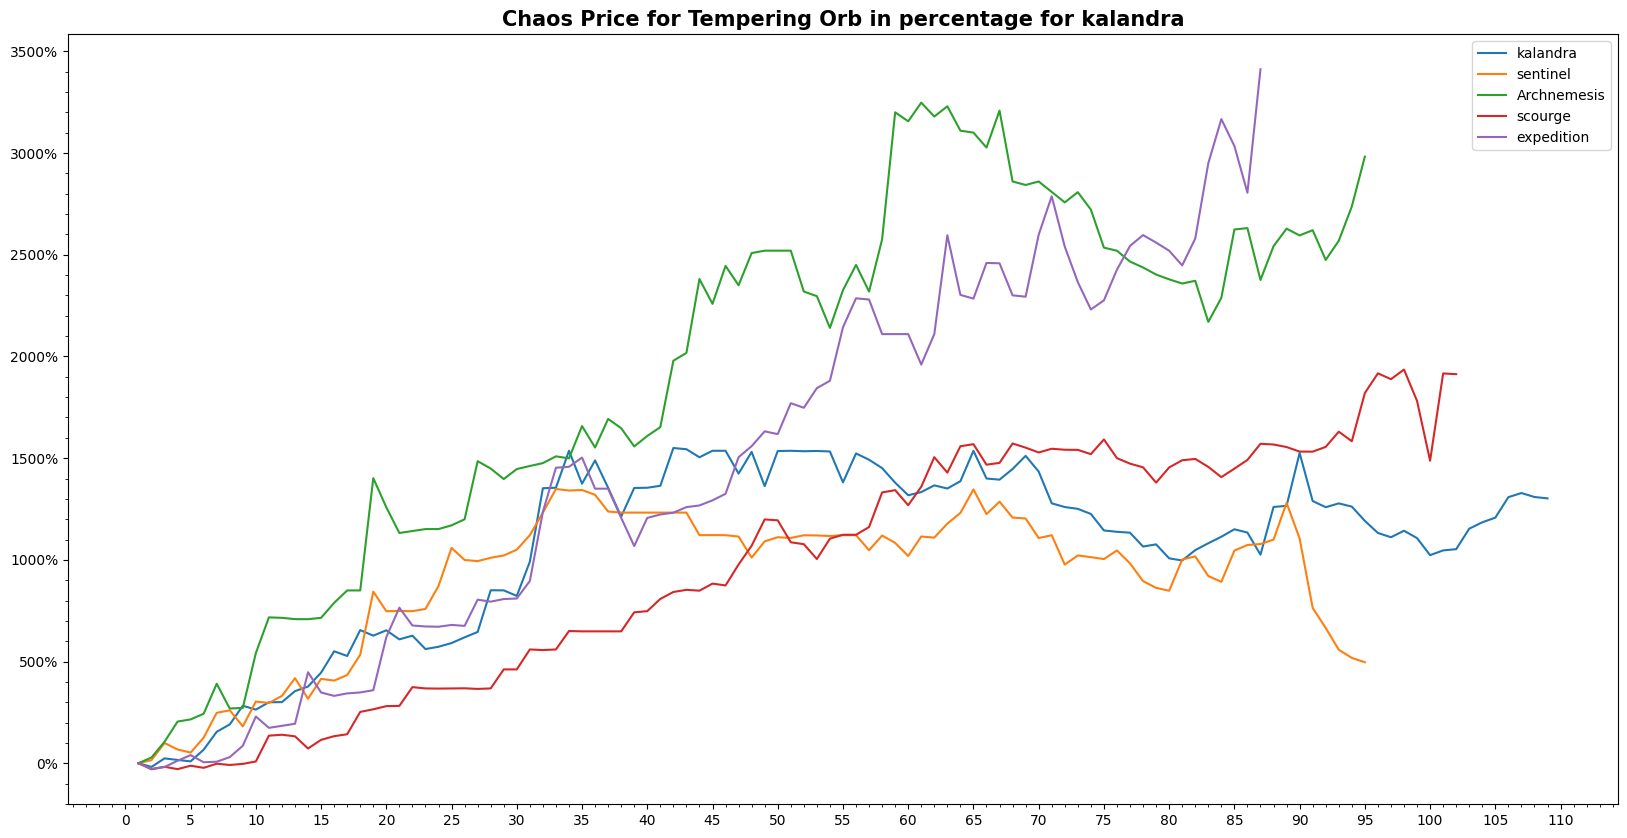

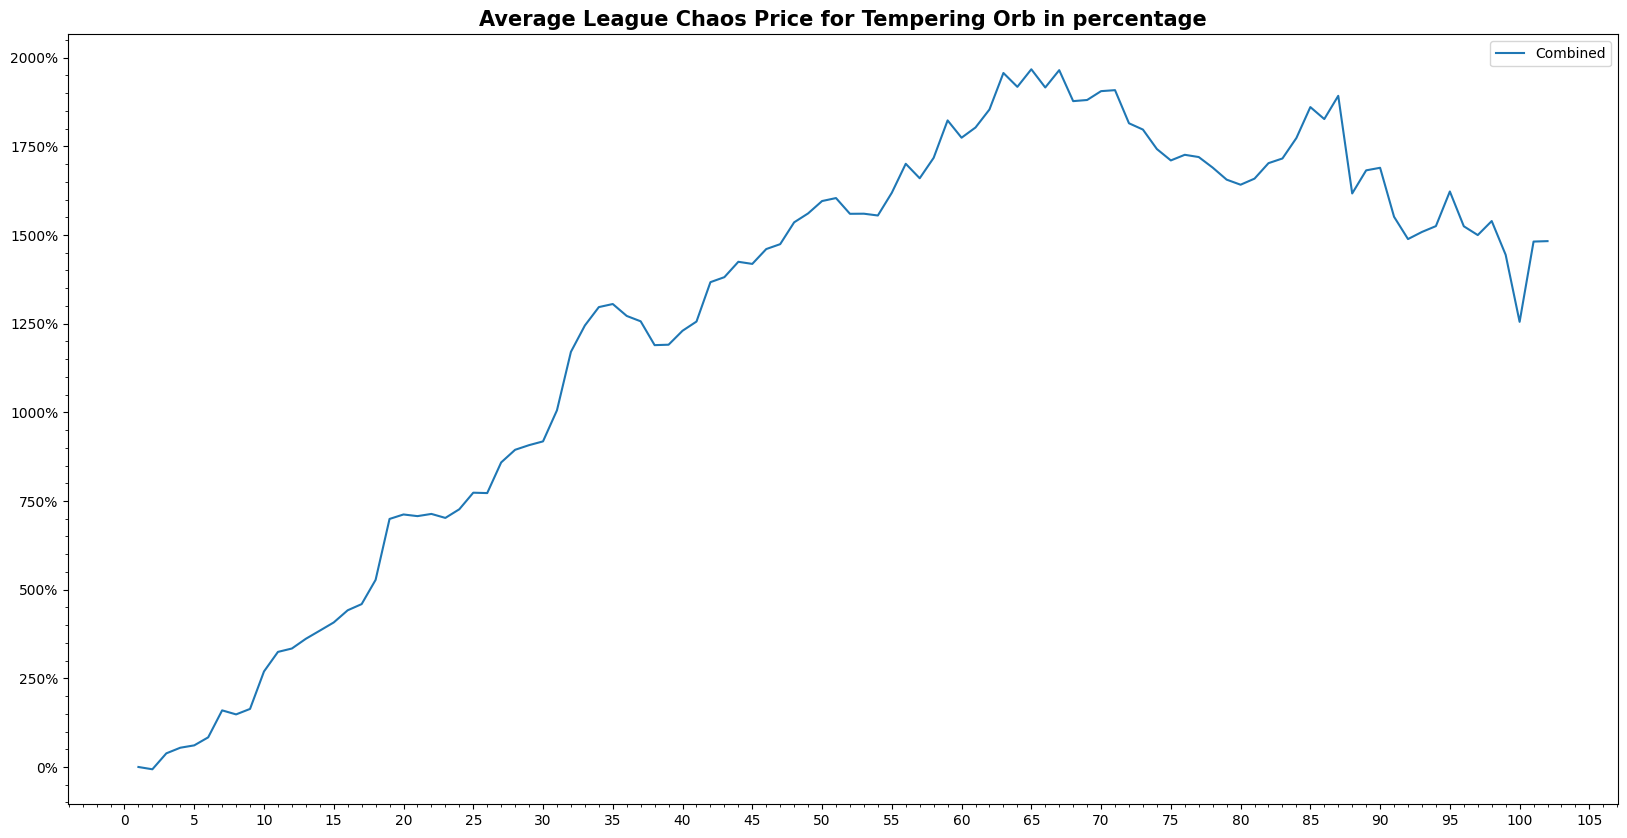

In [10]:
kalandra_temperingOrb = kalandra_currency.loc[kalandra_currency['Get']=='Tempering Orb']
sentinel_temperingOrb = sentinel_currency.loc[sentinel_currency['Get']=='Tempering Orb']
archnemesis_temperingOrb = archnemesis_currency.loc[archnemesis_currency['Get']=='Tempering Orb']
scourge_temperingOrb = scourge_currency.loc[scourge_currency['Get']=='Tempering Orb']
expedition_temperingOrb = expedition_currency.loc[expedition_currency['Get']=='Tempering Orb']
# ultimatum_temperingOrb = ultimatum_currency.loc[ultimatum_currency['Get']=='Tempering Orb']
# ritual_temperingOrb = ritual_currency.loc[ritual_currency['Get']=='Tempering Orb']


# kalandra_temperingOrb = kalandra_temperingOrb[kalandra_temperingOrb.Value < 250000]
# kalandra_temperingOrb = kalandra_temperingOrb[kalandra_temperingOrb.Value > 1000]
kalandra_newID = kalandra_temperingOrb.copy()
sentinel_newID = sentinel_temperingOrb.copy()
archnemesis_newID = archnemesis_temperingOrb.copy()
scourge_newID = scourge_temperingOrb.copy()
expedition_newID = expedition_temperingOrb.copy()
# ultimatum_newID = ultimatum_temperingOrb.copy()
# ritual_newID = ritual_temperingOrb.copy()


kalandra_newID.insert(0, 'Days', range(1, 1+len(kalandra_newID['Date'])))
sentinel_newID.insert(0, 'Days', range(1, 1+len(sentinel_newID['Date'])))
archnemesis_newID.insert(0, 'Days', range(1, 1+len(archnemesis_newID['Date'])))
scourge_newID.insert(0, 'Days', range(1, 1+len(scourge_newID['Date'])))
expedition_newID.insert(0, 'Days', range(1, 1+len(expedition_newID['Date'])))
# ultimatum_newID.insert(0, 'Days', range(1, 1+len(ultimatum_newID['Date'])))
# ritual_newID.insert(0, 'Days', range(1, 1+len(ritual_newID['Date'])))

#Graph 1 Start here

# fig, ax = plt.subplots(figsize=(20,10))
# plt.title('Chaos Price for Tempering Orb', fontsize=15,fontweight='bold')
# ax.plot(kalandra_newID['Days'],kalandra_newID['Value'], label = 'Kalandra')
# ax.plot(sentinel_newID['Days'],sentinel_newID['Value'], label = 'Sentinel')
# ax.plot(archnemesis_newID['Days'],archnemesis_newID['Value'], label = 'Archnemesis')
# ax.plot(scourge_newID['Days'],scourge_newID['Value'], label = 'Scourge')
# ax.plot(expedition_newID['Days'],expedition_newID['Value'], label = 'Expedition')
# # ax.plot(ultimatum_newID['Days'],ultimatum_newID['Value'], label = 'Ultimatum')
# # ax.plot(ritual_newID['Days'],ritual_newID['Value'], label = 'Ritual')
# ax.legend()
# fig.show()

#Graph 1 End here


kalandra_Ref1stDay = kalandra_temperingOrb.copy()
sentinel_Ref1stDay = sentinel_temperingOrb.copy()
archnemesis_Ref1stDay = archnemesis_temperingOrb.copy()
scourge_Ref1stDay = scourge_temperingOrb.copy()
expedition_Ref1stDay = expedition_temperingOrb.copy()
# ultimatum_Ref1stDay = ultimatum_temperingOrb.copy()
# ritual_Ref1stDay = ritual_temperingOrb.copy()


def get_variation(values: pd.Series) -> np.float64:
    base = values.iloc[0]  # first element in window iteration
    current = values.iloc[-1]  # last element in window iteration
    return (current - base) / base if base else 0  # avoid ZeroDivisionError

kalandra_Ref1stDay.insert(0, 'Days', range(1, 1+len(kalandra_Ref1stDay['Date'])))
kalandra_Ref1stDay.insert(4, 'Pct_change_RefDay_1', kalandra_Ref1stDay['Value'].expanding().apply(get_variation))
# kalandra_Ref1stDay = kalandra_Ref1stDay.assign(change=variations.droplevel(0)) #dont know whats this for
sentinel_Ref1stDay.insert(0, 'Days', range(1, 1+len(sentinel_Ref1stDay['Date'])))
sentinel_Ref1stDay.insert(4, 'Pct_change_RefDay_1', sentinel_Ref1stDay['Value'].expanding().apply(get_variation))
archnemesis_Ref1stDay.insert(0, 'Days', range(1, 1+len(archnemesis_Ref1stDay['Date'])))
archnemesis_Ref1stDay.insert(4, 'Pct_change_RefDay_1', archnemesis_Ref1stDay['Value'].expanding().apply(get_variation))
scourge_Ref1stDay.insert(0, 'Days', range(1, 1+len(scourge_Ref1stDay['Date'])))
scourge_Ref1stDay.insert(4, 'Pct_change_RefDay_1', scourge_Ref1stDay['Value'].expanding().apply(get_variation))

expedition_Ref1stDay.insert(0, 'Days', range(1, 1+len(expedition_Ref1stDay['Date'])))
expedition_Ref1stDay.insert(4, 'Pct_change_RefDay_1', expedition_Ref1stDay['Value'].expanding().apply(get_variation))
# ultimatum_Ref1stDay.insert(0, 'Days', range(1, 1+len(ultimatum_Ref1stDay['Date'])))
# ultimatum_Ref1stDay.insert(4, 'Pct_change_RefDay_1', ultimatum_Ref1stDay['Value'].expanding().apply(get_variation))
# ritual_Ref1stDay.insert(0, 'Days', range(1, 1+len(ritual_Ref1stDay['Date'])))
# ritual_Ref1stDay.insert(4, 'Pct_change_RefDay_1', ritual_Ref1stDay['Value'].expanding().apply(get_variation))

fig, ax = plt.subplots(figsize=(20,10))
plt.title('Chaos Price for Tempering Orb in percentage for kalandra', fontsize=15,fontweight='bold')
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.xaxis.set_major_locator(MultipleLocator(5))
ax.yaxis.set_major_formatter(PercentFormatter(xmax=1))
ax.yaxis.set_minor_locator(AutoMinorLocator(5))


ax.plot(kalandra_Ref1stDay['Days'],kalandra_Ref1stDay['Pct_change_RefDay_1'],label = 'kalandra')
ax.plot(sentinel_Ref1stDay['Days'],sentinel_Ref1stDay['Pct_change_RefDay_1'],label = 'sentinel')
ax.plot(archnemesis_Ref1stDay['Days'],archnemesis_Ref1stDay['Pct_change_RefDay_1'],label = 'Archnemesis')
ax.plot(scourge_Ref1stDay['Days'],scourge_Ref1stDay['Pct_change_RefDay_1'],label = 'scourge')
ax.plot(expedition_Ref1stDay['Days'],expedition_Ref1stDay['Pct_change_RefDay_1'],label = 'expedition')
# ax.plot(ultimatum_Ref1stDay['Days'],ultimatum_Ref1stDay['Pct_change_RefDay_1'],label = 'ultimatum')
# ax.plot(ritual_Ref1stDay['Days'],ritual_Ref1stDay['Pct_change_RefDay_1'],label = 'ritual')
ax.legend()

glued_kalandra = kalandra_Ref1stDay.copy()
glued_kalandra = glued_kalandra.reset_index()
glued_sentinel = sentinel_Ref1stDay.copy()
glued_sentinel = glued_sentinel.reset_index()
glued_archnemesis = archnemesis_Ref1stDay.copy()
glued_archnemesis = glued_archnemesis.reset_index()
glued_scourge = scourge_Ref1stDay.copy()
glued_scourge = glued_scourge.reset_index()
glued_expedition = expedition_Ref1stDay.copy()
glued_expedition = glued_expedition.reset_index()

glued_temperingOrb = pd.concat([glued_scourge['Days'],glued_kalandra['Pct_change_RefDay_1'],
                   glued_sentinel['Pct_change_RefDay_1'], glued_archnemesis['Pct_change_RefDay_1'],
                  glued_scourge['Pct_change_RefDay_1'],glued_expedition['Pct_change_RefDay_1']], axis=1)
# glued
df_temperingOrb = glued_temperingOrb.groupby(level=0, axis=1).mean()
fig, ax = plt.subplots(figsize=(20,10))
plt.title('Average League Chaos Price for Tempering Orb in percentage', fontsize=15,fontweight='bold')
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.xaxis.set_major_locator(MultipleLocator(5))
ax.yaxis.set_major_formatter(PercentFormatter(xmax=1))
ax.yaxis.set_minor_locator(AutoMinorLocator(5))

ax.plot(df_temperingOrb['Days'],df_temperingOrb['Pct_change_RefDay_1'],label = 'Combined')
ax.legend()

In [11]:
kalandra_tailoringOrb = kalandra_currency.loc[kalandra_currency['Get']=='Tailoring Orb']
sentinel_tailoringOrb = sentinel_currency.loc[sentinel_currency['Get']=='Tailoring Orb']
archnemesis_tailoringOrb = archnemesis_currency.loc[archnemesis_currency['Get']=='Tailoring Orb']
scourge_tailoringOrb = scourge_currency.loc[scourge_currency['Get']=='Tailoring Orb']
expedition_tailoringOrb = expedition_currency.loc[expedition_currency['Get']=='Tailoring Orb']
# ultimatum_tailoringOrb = ultimatum_currency.loc[ultimatum_currency['Get']=='Tailoring Orb']
# ritual_tailoringOrb = ritual_currency.loc[ritual_currency['Get']=='Tailoring Orb']

# kalandra_tailoringOrb = kalandra_tailoringOrb[kalandra_tailoringOrb.Value < 250000]
# kalandra_tailoringOrb = kalandra_tailoringOrb[kalandra_tailoringOrb.Value > 1000]

kalandra_newID = kalandra_tailoringOrb.copy()
sentinel_newID = sentinel_tailoringOrb.copy()
archnemesis_newID = archnemesis_tailoringOrb.copy()
scourge_newID = scourge_tailoringOrb.copy()
expedition_newID = expedition_tailoringOrb.copy()
# ultimatum_newID = ultimatum_tailoringOrb.copy()
# ritual_newID = ritual_tailoringOrb.copy()

kalandra_newID.insert(0, 'Days', range(1, 1+len(kalandra_newID['Date'])))
sentinel_newID.insert(0, 'Days', range(1, 1+len(sentinel_newID['Date'])))
archnemesis_newID.insert(0, 'Days', range(1, 1+len(archnemesis_newID['Date'])))
scourge_newID.insert(0, 'Days', range(1, 1+len(scourge_newID['Date'])))
expedition_newID.insert(0, 'Days', range(1, 1+len(expedition_newID['Date'])))
# ultimatum_newID.insert(0, 'Days', range(1, 1+len(ultimatum_newID['Date'])))
# ritual_newID.insert(0, 'Days', range(1, 1+len(ritual_newID['Date'])))

#Graph 1 Start here

# fig, ax = plt.subplots(figsize=(20,10))
# plt.title('Chaos Price for Tailoring Orb', fontsize=15,fontweight='bold')
# ax.plot(kalandra_newID['Days'],kalandra_newID['Value'], label = 'Kalandra')
# ax.plot(sentinel_newID['Days'],sentinel_newID['Value'], label = 'Sentinel')
# ax.plot(archnemesis_newID['Days'],archnemesis_newID['Value'], label = 'Archnemesis')
# ax.plot(scourge_newID['Days'],scourge_newID['Value'], label = 'Scourge')
# ax.plot(expedition_newID['Days'],expedition_newID['Value'], label = 'Expedition')
# # ax.plot(ultimatum_newID['Days'],ultimatum_newID['Value'], label = 'Ultimatum')
# # ax.plot(ritual_newID['Days'],ritual_newID['Value'], label = 'Ritual')
# ax.legend()
# fig.show()
#Graph 1 End here

kalandra_Ref1stDay = kalandra_tailoringOrb.copy()
sentinel_Ref1stDay = sentinel_tailoringOrb.copy()
archnemesis_Ref1stDay = archnemesis_tailoringOrb.copy()
scourge_Ref1stDay = scourge_tailoringOrb.copy()
expedition_Ref1stDay = expedition_tailoringOrb.copy()
# ultimatum_Ref1stDay = ultimatum_tailoringOrb.copy()
# ritual_Ref1stDay = ritual_tailoringOrb.copy()

def get_variation(values: pd.Series) -> np.float64:
    base = values.iloc[0]  # first element in window iteration
    current = values.iloc[-1]  # last element in window iteration
    return (current - base) / base if base else 0  # avoid ZeroDivisionError

kalandra_Ref1stDay.insert(0, 'Days', range(1, 1+len(kalandra_Ref1stDay['Date'])))
kalandra_Ref1stDay.insert(4, 'Pct_change_RefDay_1', kalandra_Ref1stDay['Value'].expanding().apply(get_variation))
# kalandra_Ref1stDay = kalandra_Ref1stDay.assign(change=variations.droplevel(0)) #dont know whats this for
sentinel_Ref1stDay.insert(0, 'Days', range(1, 1+len(sentinel_Ref1stDay['Date'])))
sentinel_Ref1stDay.insert(4, 'Pct_change_RefDay_1', sentinel_Ref1stDay['Value'].expanding().apply(get_variation))
archnemesis_Ref1stDay.insert(0, 'Days', range(1, 1+len(archnemesis_Ref1stDay['Date'])))
archnemesis_Ref1stDay.insert(4, 'Pct_change_RefDay_1', archnemesis_Ref1stDay['Value'].expanding().apply(get_variation))
scourge_Ref1stDay.insert(0, 'Days', range(1, 1+len(scourge_Ref1stDay['Date'])))
scourge_Ref1stDay.insert(4, 'Pct_change_RefDay_1', scourge_Ref1stDay['Value'].expanding().apply(get_variation))
expedition_Ref1stDay.insert(0, 'Days', range(1, 1+len(expedition_Ref1stDay['Date'])))
expedition_Ref1stDay.insert(4, 'Pct_change_RefDay_1', expedition_Ref1stDay['Value'].expanding().apply(get_variation))
# ultimatum_Ref1stDay.insert(0, 'Days', range(1, 1+len(ultimatum_Ref1stDay['Date'])))
# ultimatum_Ref1stDay.insert(4, 'Pct_change_RefDay_1', ultimatum_Ref1stDay['Value'].expanding().apply(get_variation))
# ritual_Ref1stDay.insert(0, 'Days', range(1, 1+len(ritual_Ref1stDay['Date'])))
# ritual_Ref1stDay.insert(4, 'Pct_change_RefDay_1', ritual_Ref1stDay['Value'].expanding().apply(get_variation))

#Graph 2 Start here

# fig, ax = plt.subplots(figsize=(20,10))
# plt.title('Chaos Price for Tailoring Orb in percentage for kalandra', fontsize=15,fontweight='bold')
# ax.xaxis.set_minor_locator(MultipleLocator(1))
# ax.xaxis.set_major_locator(MultipleLocator(5))
# ax.yaxis.set_major_formatter(PercentFormatter(xmax=1))
# ax.yaxis.set_minor_locator(AutoMinorLocator(5))
# ax.plot(kalandra_Ref1stDay['Days'],kalandra_Ref1stDay['Pct_change_RefDay_1'],label = 'kalandra')
# ax.plot(sentinel_Ref1stDay['Days'],sentinel_Ref1stDay['Pct_change_RefDay_1'],label = 'sentinel')
# ax.plot(archnemesis_Ref1stDay['Days'],archnemesis_Ref1stDay['Pct_change_RefDay_1'],label = 'Archnemesis')
# ax.plot(scourge_Ref1stDay['Days'],scourge_Ref1stDay['Pct_change_RefDay_1'],label = 'scourge')
# ax.plot(expedition_Ref1stDay['Days'],expedition_Ref1stDay['Pct_change_RefDay_1'],label = 'expedition')
# # ax.plot(ultimatum_Ref1stDay['Days'],ultimatum_Ref1stDay['Pct_change_RefDay_1'],label = 'ultimatum')
# # ax.plot(ritual_Ref1stDay['Days'],ritual_Ref1stDay['Pct_change_RefDay_1'],label = 'ritual')
# ax.legend()
#Graph 2 End here

glued_kalandra = kalandra_Ref1stDay.copy()
glued_kalandra = glued_kalandra.reset_index()
glued_sentinel = sentinel_Ref1stDay.copy()
glued_sentinel = glued_sentinel.reset_index()
glued_archnemesis = archnemesis_Ref1stDay.copy()
glued_archnemesis = glued_archnemesis.reset_index()
glued_scourge = scourge_Ref1stDay.copy()
glued_scourge = glued_scourge.reset_index()
glued_expedition = expedition_Ref1stDay.copy()
glued_expedition = glued_expedition.reset_index()

glued_tailoringOrb = pd.concat([glued_scourge['Days'],glued_kalandra['Pct_change_RefDay_1'],
                   glued_sentinel['Pct_change_RefDay_1'], glued_archnemesis['Pct_change_RefDay_1'],
                  glued_scourge['Pct_change_RefDay_1'],glued_expedition['Pct_change_RefDay_1']], axis=1)
# glued
df_tailoringOrb = glued_tailoringOrb.groupby(level=0, axis=1).mean()

#Graph 3 Start here

# fig, ax = plt.subplots(figsize=(20,10))
# plt.title('Average League Chaos Price for Tailoring Orb in percentage', fontsize=15,fontweight='bold')
# ax.xaxis.set_minor_locator(MultipleLocator(1))
# ax.xaxis.set_major_locator(MultipleLocator(5))
# ax.yaxis.set_major_formatter(PercentFormatter(xmax=1))
# ax.yaxis.set_minor_locator(AutoMinorLocator(5))

# ax.plot(df_tailoringOrb['Days'],df_tailoringOrb['Pct_change_RefDay_1'],label = 'Combined')
# ax.legend()
#Graph 3 End here


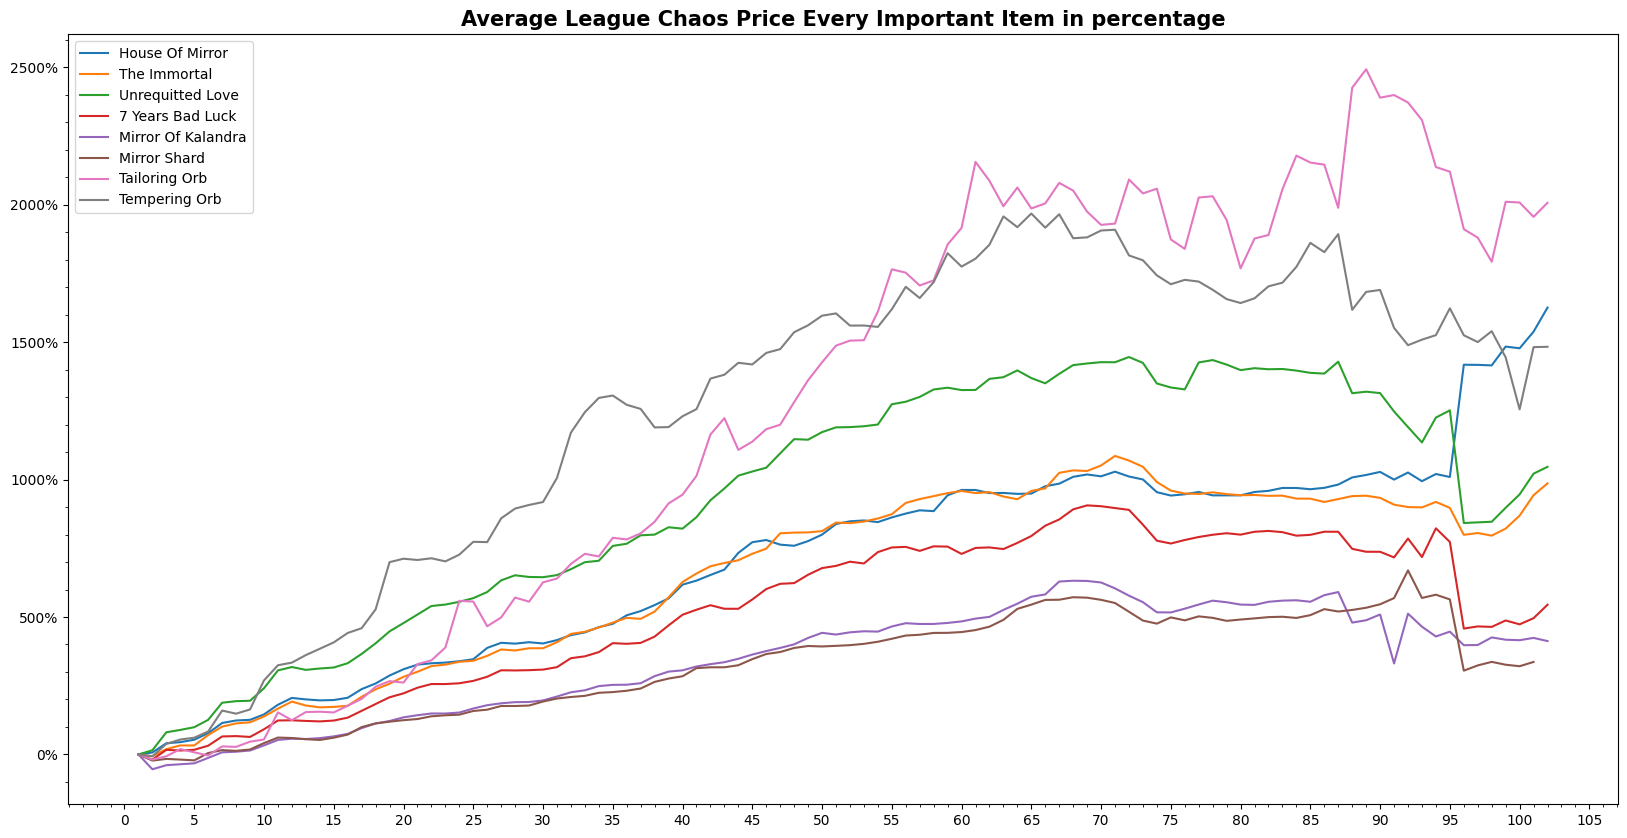

In [15]:
fig, ax = plt.subplots(figsize=(20,10))
plt.title('Average League Chaos Price Every Important Item in percentage', fontsize=15,fontweight='bold')
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.xaxis.set_major_locator(MultipleLocator(5))
ax.yaxis.set_major_formatter(PercentFormatter(xmax=1))
ax.yaxis.set_minor_locator(AutoMinorLocator(5))

ax.plot(df_houseOfMirror['Days'],df_houseOfMirror['Pct_change_RefDay_1'],label = 'House Of Mirror')
ax.plot(df_TheImmortal['Days'],df_TheImmortal['Pct_change_RefDay_1'],label = 'The Immortal')
ax.plot(df_unrequitedLove['Days'],df_unrequitedLove['Pct_change_RefDay_1'],label = 'Unrequitted Love')
ax.plot(df_sevenYearsBadLuck['Days'],df_sevenYearsBadLuck['Pct_change_RefDay_1'],label = '7 Years Bad Luck')
ax.plot(df_mirrorOfKal['Days'],df_mirrorOfKal['Pct_change_RefDay_1'],label = 'Mirror Of Kalandra')
ax.plot(df_mirrorShard['Days'],df_mirrorShard['Pct_change_RefDay_1'],label = 'Mirror Shard')
ax.plot(df_tailoringOrb['Days'],df_tailoringOrb['Pct_change_RefDay_1'],label = 'Tailoring Orb')
ax.plot(df_temperingOrb['Days'],df_temperingOrb['Pct_change_RefDay_1'],label = 'Tempering Orb')

ax.legend()